In [1]:
!apt-get update

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2404/x86_64  InRelease [1581 B]
Get:2 http://security.ubuntu.com/ubuntu noble-security InRelease [126 kB]      
Get:3 http://archive.ubuntu.com/ubuntu noble InRelease [256 kB]                
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2404/x86_64  Packages [959 kB]
Get:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu noble InRelease [17.8 kB]
Get:6 http://archive.ubuntu.com/ubuntu noble-updates InRelease [126 kB]        
Get:7 http://security.ubuntu.com/ubuntu noble-security/universe amd64 Packages [1151 kB]
Get:8 http://archive.ubuntu.com/ubuntu noble-backports InRelease [126 kB]      
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu noble/main amd64 Packages [40.4 kB]
Get:10 http://archive.ubuntu.com/ubuntu noble/universe amd64 Packages [19.3 MB]
Get:11 http://security.ubuntu.com/ubuntu noble-security/restricted amd64 Packages [2512 kB]
Get:12 http://archive.ubuntu.com/u

In [2]:
!pip install -q scikit-learn matplotlib seaborn 

In [3]:
import base64
import requests
import time
import re
import random
from pathlib import Path
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Nanum Gothic

!apt-get -qq install fonts-nanum
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False

debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package fonts-nanum.
(Reading database ... 49062 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.15.0-1.1ubuntu2) ...


In [4]:
!pip install -q vllm

In [ ]:
from datasets import load_dataset
import os

# HuggingFace 데이터셋 이름 설정
# 본인의 데이터셋 이름으로 변경하세요
# 형식: "your-username/your-dataset-name"
HF_DATASET_NAME = os.getenv("HF_DATASET_NAME", "your-username/your-dataset-name")

dataset = load_dataset(HF_DATASET_NAME, split="test")

README.md:   0%|          | 0.00/498 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

data/train-00000-of-00019.parquet:   0%|          | 0.00/780M [00:00<?, ?B/s]

data/train-00001-of-00019.parquet:   0%|          | 0.00/539M [00:00<?, ?B/s]

data/train-00002-of-00019.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

data/train-00003-of-00019.parquet:   0%|          | 0.00/613M [00:00<?, ?B/s]

data/train-00004-of-00019.parquet:   0%|          | 0.00/614M [00:00<?, ?B/s]

data/train-00005-of-00019.parquet:   0%|          | 0.00/253M [00:00<?, ?B/s]

data/train-00006-of-00019.parquet:   0%|          | 0.00/583M [00:00<?, ?B/s]

data/train-00007-of-00019.parquet:   0%|          | 0.00/682M [00:00<?, ?B/s]

data/train-00008-of-00019.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

data/train-00009-of-00019.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

data/train-00010-of-00019.parquet:   0%|          | 0.00/702M [00:00<?, ?B/s]

data/train-00011-of-00019.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

data/train-00012-of-00019.parquet:   0%|          | 0.00/403M [00:00<?, ?B/s]

data/train-00013-of-00019.parquet:   0%|          | 0.00/754M [00:00<?, ?B/s]

data/train-00014-of-00019.parquet:   0%|          | 0.00/371M [00:00<?, ?B/s]

data/train-00015-of-00019.parquet:   0%|          | 0.00/343M [00:00<?, ?B/s]

data/train-00016-of-00019.parquet:   0%|          | 0.00/742M [00:00<?, ?B/s]

data/train-00017-of-00019.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

data/train-00018-of-00019.parquet:   0%|          | 0.00/268M [00:00<?, ?B/s]

data/test-00000-of-00003.parquet:   0%|          | 0.00/404M [00:00<?, ?B/s]

data/test-00001-of-00003.parquet:   0%|          | 0.00/385M [00:00<?, ?B/s]

data/test-00002-of-00003.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9600 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1200 [00:00<?, ? examples/s]

In [6]:
# 진단 프롬프트
instruction = """
너는 안면부 피부 질환을 분석하는 전문 AI이다. 
주어진 얼굴 부위 피부 이미지를 관찰하고, 이미지에서 보이는 임상적 특징을 자세히 설명하라.

**중요 지침:**
- 다음 피부 질환 목록 중 가장 두드러진 주된 질환 1개를 <label>에 명시하라
- summary에서 동반 가능한 다른 질환의 소견이 있다면 함께 언급할 수 있다
- 3문장 이내로 간결하면서도 핵심적인 정보를 담아라. 같은 표현 반복을 피하라
- 과도한 추측보다는 이미지에서 관찰 가능한 객관적 소견 및 특징에 근거하여 기술하라

다음은 진단 가능한 피부 질환 목록과 각 질환의 임상적 특징이다:

**0: 건선 (Psoriasis)**
- 병변 형태: 은백색 인설이 쌓인 붉은 구진이나 판
- 경계: 매우 명확하고 뚜렷함
- 안면 발생: 이마, 헤어라인, 귀 주변에서 관찰 가능
- 핵심 특징: 두꺼운 은백색 인설, 명확한 경계, 대칭적 분포
- 증상: 가려움증 동반 가능

**1: 아토피 피부염 (Atopic Dermatitis)**
- 병변 형태: 건조하고 가려운 습진성 병변, 태선화
- 경계: 불명확
- 안면 발생: 얼굴 전반, 특히 뺨, 이마, 눈 주위
- 핵심 특징: 피부 건조, 긁은 자국, 만성 재발성
- 증상: 심한 가려움증

**2: 여드름 (Acne)**
- 병변 형태: 면포(comedone), 구진, 농포, 낭종
- 경계: 개별 병변은 명확
- 안면 발생: 이마, 코, 턱 등 T존 중심, 뺨에도 가능
- 핵심 특징: 다양한 병변 동시 존재, 피지선 분포 부위
- 증상: 염증성 병변은 통증 가능

**3: 주사 (Rosacea)**
- 병변 형태: 지속적인 홍반, 모세혈관 확장, 구진, 농포
- 경계: 불명확한 홍반
- 안면 발생: 얼굴 중앙부(코, 뺨 중심, 이마)
- 핵심 특징: 안면 홍조, 혈관 확장 두드러짐, 딸기코 가능
- 증상: 작열감, 따끔거림

**4: 지루 피부염 (Seborrheic Dermatitis)**
- 병변 형태: 기름기 있는 노란 비늘과 홍반
- 경계: 비교적 명확
- 안면 발생: 눈썹, 비구순 주름, 귀 주변, 헤어라인
- 핵심 특징: 기름진 각질, 피지선이 많은 부위
- 증상: 가려움증, 각질

**5: 정상 (Normal)**
- 특징: 특별한 병변이 관찰되지 않음
- 피부 상태: 건강한 피부 톤과 질감

---

**답변 형식:**
<label>{질병명}</label>
<summary>{이미지에서 관찰되는 구체적 소견을 자세히 기술. 병변의 색상, 형태, 경계, 분포, 크기 등을 포함하여 해당 질환의 특징적 소견임을 설명.}</summary>

**예시 1:**
<label>건선</label>
<summary>이미지에서는 이마와 헤어라인 부위에 홍반성 판이 관찰되며, 그 위로 은백색의 두꺼운 인설이 층을 이루어 쌓여있습니다. 병변의 경계가 매우 명확하여 주변 정상 피부와 뚜렷하게 구분됩니다. 인설의 두께와 은백색 광택, 명확한 경계는 건선의 전형적인 임상 양상입니다.</summary>

**예시 2:**
<label>여드름</label>
<summary>이미지에서는 얼굴의 이마와 뺨 부위에 다수의 홍반성 구진과 농포가 관찰됩니다. 일부 병변은 중심부에 화농성 내용물이 있으며, 면포도 함께 보입니다. 피지선이 발달한 안면부에 염증성 병변과 비염증성 병변이 혼재된 양상은 심상성 여드름의 특징적 소견입니다.</summary>

**예시 3:**
<label>정상</label>
<summary>이미지에서는 특별한 병변이나 이상 소견이 관찰되지 않습니다. 피부 톤이 균일하고 질감이 매끄러우며, 홍반, 구진, 인설 등의 병적 변화가 없습니다. 건강한 정상 피부 상태를 보이고 있습니다.</summary>

**특수 상황:**
- 얼굴 부위가 아닌 이미지이거나, 이미지 품질이 매우 불량하여 판단이 불가능한 경우:
<label>진단불가</label>
<summary>제공된 이미지는 얼굴 부위가 아니거나 이미지 품질이 불량하여 피부 질환을 판단할 수 없습니다.</summary>
"""

In [7]:
import re, random, base64
from io import BytesIO
from PIL import Image
import numpy as np
from tqdm import tqdm

# --- PIL 이미지 → base64 (PNG) ---
def encode_image(img):
    if not isinstance(img, Image.Image):
        img = Image.fromarray(np.array(img))
    buf = BytesIO()
    img.save(buf, format="PNG")
    return base64.b64encode(buf.getvalue()).decode("utf-8")

# --- 라벨 정규화(정수/문자 섞여도 문자열로 통일) ---
def get_true_label(ex):
    lab = ex.get("label", None)
    if lab is None:
        return "UNKNOWN"
    return str(lab)



In [8]:
image_base64 = encode_image(dataset[0]['image'])

In [ ]:
from openai import OpenAI
import os

# vLLM API 서버 설정
# Step 3에서 배포한 vLLM 서버의 URL을 입력하세요
# 로컬 배포: http://localhost:8001/v1
# RunPod 엔드포인트: https://api.runpod.ai/v2/your-endpoint-id/openai/v1
API_BASE_URL = os.getenv("VLLM_API_URL", "http://localhost:8001/v1")
API_KEY = os.getenv("VLLM_API_KEY", "empty")  # 로컬 배포 시 "empty" 사용

client = OpenAI(
    api_key=API_KEY,
    base_url=API_BASE_URL
)
model = client.models.list().data[0].id
image_base64 = encode_image(dataset[0]['image'])
chat_response = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": instruction},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{image_base64}",
                    },
                },

            ],
        }
    ],
)
print("Chat response:", chat_response.choices[0].message.content)

Chat response: <label>지루성 피부염</label>
<summary>이미지에서는 이마와 눈썹 주변, 코 주변에 유분이 있는 노란색 인설과 경미한 홍반이 관찰됩니다. 병변의 경계는 상대적으로 명확하며, 특히 T존 부위를 중심으로 분포하고 있는 특징이 나타납니다. 피부는 기름져 보이며, 인설의 색상은 노란색을 띠고 있습니다. 통상적인 지루성 피부염의 임상 양상으로, 가려움증이 동반될 가능성도 있습니다.</summary>


In [ ]:
# --- 샘플 선택(최대 500개) ---
N = len(dataset)
idxs = random.sample(range(N), min(500, N))

true_labels = []
predicted_labels = []

# 라벨 통일 함수
def normalize_label(label):
    label = label.strip()
    label_map = {
        '지루성 피부염': '지루',
        '지루 피부염': '지루',
        '지루피부염': '지루',
        '아토피 피부염': '아토피',
        '아토피피부염': '아토피'
    }
    return label_map.get(label, label)

# 유효 라벨 
valid_labels = ['건선', '주사', '지루', '여드름', '아토피', '정상']

for k, i in enumerate(tqdm(idxs, desc="Evaluating via API"), 1):
    ex = dataset[i]
    true_label = get_true_label(ex)

    # base64 인코딩 → data URL
    b64 = encode_image(ex["image"])
    data_url = f"data:image/png;base64,{b64}"

    # API 호출
    chat_response = client.chat.completions.create(
        model=model,  # 비전 지원 모델 지정 (예: "gpt-4o-mini")
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": instruction},
                    {"type": "image_url", "image_url": {"url": data_url}},
                ],
            }
        ],
    )

    text = chat_response.choices[0].message.content

    # XML에서 라벨 추출
    match = re.search(r'<label>(.*?)</label>', text)
    label_text = match.group(1).strip() if match else "None"

    # 라벨 통일
    true_label = normalize_label(true_label)
    label_text = normalize_label(label_text)

    # 6개 클래스 외는 None 처리
    if label_text not in valid_labels:
        label_text = "None"

    predicted_labels.append(label_text)
    true_labels.append(true_label)

    #print(f"\n[{k}/{len(idxs)}] idx={i} | GT: {true_label} | PRED: {label_text}")





=== Confusion Matrix ===


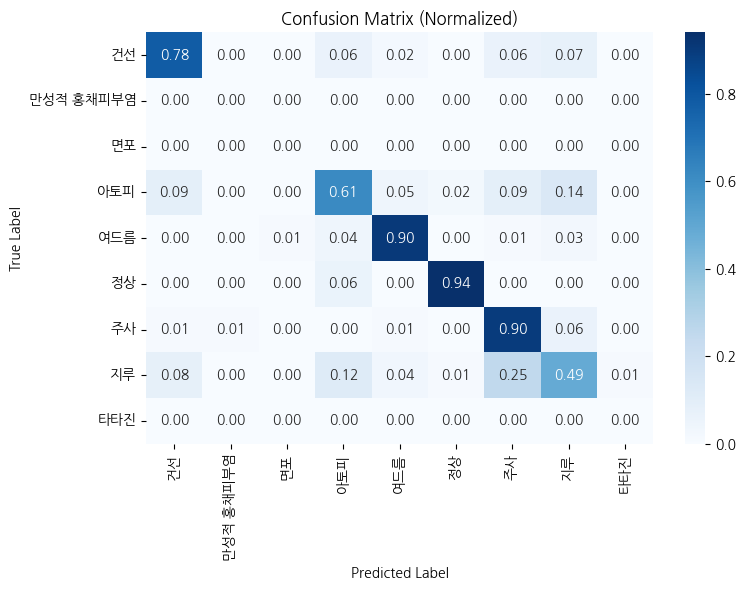

In [ ]:
# Confusion Matrix 그리기 함수
def plot_confusion_matrix(true_labels, pred_labels, labels=None, normalize=True):
    norm_option = 'true' if normalize else None

    cm = confusion_matrix(true_labels, predicted_labels, labels=labels, normalize=norm_option)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues',
                xticklabels=labels if labels else "auto",
                yticklabels=labels if labels else "auto")

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix' + (' (Normalized)' if normalize else ''))
    plt.tight_layout()
    plt.show()


# 유니크 라벨 리스트 생성 (None 제외)
unique_labels = sorted(set(true_labels + predicted_labels) - {'None'})

print("\n=== Confusion Matrix ===")
plot_confusion_matrix(true_labels, predicted_labels, labels=unique_labels, normalize=True)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

true = true_labels
pred = predicted_labels
# Accuracy
acc = accuracy_score(true, pred)

# Precision, Recall, F1 (다중 클래스에서는 average 옵션 설정 필요)
prec = precision_score(true, pred, average='macro')
rec = recall_score(true, pred, average='macro')
f1 = f1_score(true, pred, average='macro')
# classification report (label 별 precision, recall 등)
report = classification_report(true, pred, output_dict=True)

In [20]:
report

{'건선': {'precision': 0.8433734939759037,
  'recall': 0.8860759493670886,
  'f1-score': 0.8641975308641975,
  'support': 79.0},
 '아토피': {'precision': 0.8045977011494253,
  'recall': 0.7954545454545454,
  'f1-score': 0.8,
  'support': 88.0},
 '여드름': {'precision': 0.9230769230769231,
  'recall': 0.8780487804878049,
  'f1-score': 0.9,
  'support': 82.0},
 '정상': {'precision': 0.9444444444444444,
  'recall': 0.9550561797752809,
  'f1-score': 0.9497206703910615,
  'support': 89.0},
 '주사': {'precision': 0.7731958762886598,
  'recall': 0.872093023255814,
  'f1-score': 0.819672131147541,
  'support': 86.0},
 '지루': {'precision': 0.6461538461538462,
  'recall': 0.5526315789473685,
  'f1-score': 0.5957446808510638,
  'support': 76.0},
 'accuracy': 0.828,
 'macro avg': {'precision': 0.8224737141815338,
  'recall': 0.8232266762146502,
  'f1-score': 0.8215558355423106,
  'support': 500.0},
 'weighted avg': {'precision': 0.8255630092832522,
  'recall': 0.828,
  'f1-score': 0.8255302872528908,
  'suppor